### Concepts of Buy and Hold Approach

This approach involves purchasing an asset, holding it for a given time period and calculating returns after the specific time period

Data : Obtain historical Adj Close price of asset

#### Buy and Hold Strategy Implementation 

Buy the asset at the beginning of the period and hold it until the end of the investment horizon

#### Evaluation

Calculate the returns over the investment horizon to assess performance

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

In [8]:
start = '2018-12-30'
end = '2022-12-12'

data = yf.download('AMD',start=start,end=end) 

[*********************100%%**********************]  1 of 1 completed


Calculating Returns

In [9]:
data['Returns'] = data['Adj Close'].pct_change()

Buy and Hold Strategy from start date to end date

In [10]:
intial_price = data['Adj Close'].iloc[0]
final_price = data['Adj Close'].iloc[-1]

buy_hold_returns = (final_price-intial_price)/intial_price

Plotting Prices

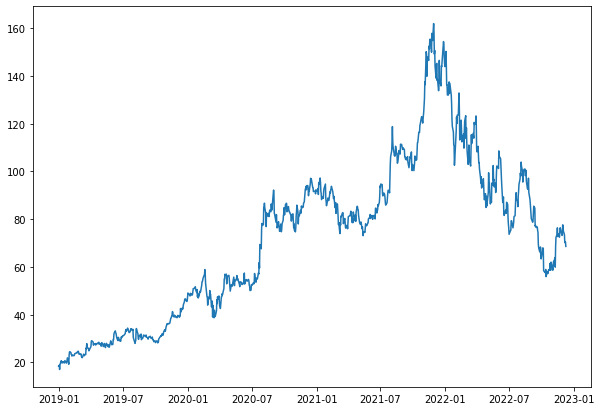

In [11]:
plt.figure(figsize=(10,7))
plt.plot(data.index, data['Adj Close'])
plt.show() 

In [12]:
print(f"Buy and Hold Returns: {buy_hold_returns:.2%}")

Buy and Hold Returns: 271.56%


Buy and Hold Strategy for every 30 days

In [14]:
buy_hold_ret = [] 

for start_date in pd.date_range(start=data.index[0],end=data.index[-1],freq='30D'):
    end_date = start_date + pd.Timedelta(days=29)

    period_data = data.loc[(data.index>=start_date) & (data.index<=end_date)]

    intial_price = period_data['Adj Close'].iloc[0]
    final_price = period_data['Adj Close'].iloc[-1]

    period_return = (final_price-intial_price)/intial_price

    buy_hold_ret.append(period_return) 

print(buy_hold_ret) 

[0.04279528465371598, 0.019055891344734472, 0.07770270814505514, 0.05045523114228473, 0.01664860679671936, 0.08348198698770458, 0.09038460339314869, -0.09796890155745158, -0.042560147630515965, 0.13892757195376593, 0.18106270517869236, 0.19363936681311358, 0.07977691016073185, 0.08160780744497903, -0.05903904263522275, 0.25252073018244303, -0.017977966015379654, 0.029516821495758686, 0.14447117974755452, 0.40691619922696826, -0.09809823478882611, 0.04644591998709444, 0.08005055822702112, 0.1332703078997946, -0.05384537264513137, 0.0054779822233821975, -0.10807763872991925, 0.023038585352589177, -0.08223398001175779, 0.1092744829441555, 0.014648527364650353, 0.2413952539139639, -0.018222379406479056, 0.0555451088126042, 0.27020526498335956, -0.07433953840732581, -0.0939248771797675, -0.17314438728963427, -0.10518943726420199, -0.1060093640645405, 0.02213631250840332, 0.0061545187203115225, -0.12219792521509254, 0.2657379643392715, -0.15253401372125736, -0.3169895818742026, 0.03973619743

In [17]:
sum(buy_hold_ret) 

1.48148032197769

In [18]:
print(f"Buy and Hold Returns: {sum(buy_hold_ret):.2%}")

Buy and Hold Returns: 148.15%


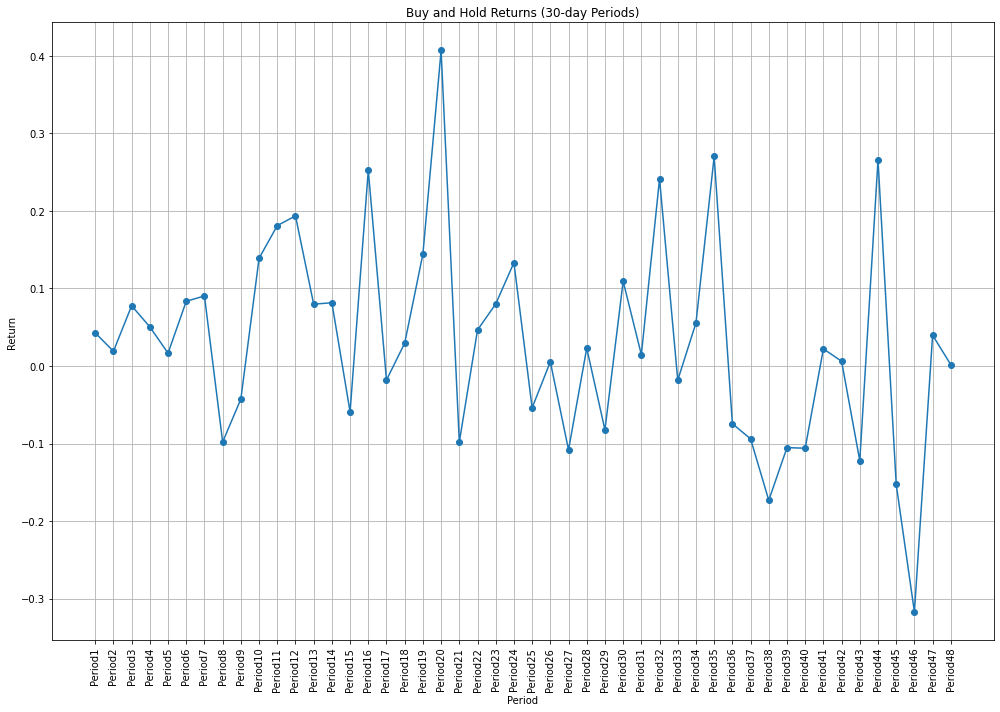

In [23]:
plt.figure(figsize=(14,10))
plt.plot(buy_hold_ret, marker='o', linestyle='-')
plt.title('Buy and Hold Returns (30-day Periods)') 
plt.xlabel('Period') 
plt.ylabel('Return') 
plt.grid(True) 
plt.xticks(ticks=range(len(buy_hold_ret)),labels=[f'Period{i+1}' for i in range(len(buy_hold_ret))],
           rotation=90) 
plt.tight_layout() 
plt.show() 